<a href="https://colab.research.google.com/github/hossaini2972-coder/Assignment_OOPs/blob/main/Flipkart_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flipkart aims to evaluate its sales performance and understand profitability issues across categories and products. The analysis focuses on identifying revenue trends, loss-making areas, and opportunities to improve business performance.

In [40]:
import numpy as np
import pandas as pd

In [41]:
df = pd.read_csv('Flipkart Sales Report.csv', on_bad_lines='skip', engine='python')

In [42]:
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               3991 non-null   int64  
 1   Order ID            3991 non-null   object 
 2   Date                3990 non-null   object 
 3   Status              3990 non-null   object 
 4   Fulfilment          3990 non-null   object 
 5   Sales Channel       3990 non-null   object 
 6   ship-service-level  3990 non-null   object 
 7   Style               3990 non-null   object 
 8   SKU                 3990 non-null   object 
 9   Category            3990 non-null   object 
 10  Size                3990 non-null   object 
 11  ASIN                3990 non-null   object 
 12  Courier Status      3804 non-null   object 
 13  Qty                 3990 non-null   float64
 14  currency            3718 non-null   object 
 15  Amount              3718 non-null   float64
 16  ship-c

In [43]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

/tmp/ipython-input-2263964175.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [44]:
df = df.drop_duplicates(subset='Order ID')

In [45]:
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')

In [46]:
df['ship-postal-code'] = df['ship-postal-code'].astype('Int64').astype(str)

In [47]:
df['B2B'] = df['B2B'].astype(str).str.lower().map({'true': True, 'false': False})

In [48]:
# STEP 5: Text Standardization

# Standardize all DataFrame column names by stripping whitespace and converting to lowercase
df.columns = df.columns.str.lower().str.strip()

# Adjust the list of text columns to match the standardized DataFrame column names
text_cols = [
    'status',
    'fulfilment',
    'sales channel',
    'courier status',
    'category',
    'size',
    'ship-city',
    'ship-state'
]

for col in text_cols:
    # Ensure the column exists after standardization before attempting to process
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.strip()
    else:
        print(f"Warning: Column '{col}' not found in DataFrame after standardization. Skipping.")

# Display head of processed columns, only if they exist
existing_text_cols = [col for col in text_cols if col in df.columns]
if existing_text_cols:
    print(df[existing_text_cols].head())

                         status fulfilment sales channel courier status  \
0                     cancelled   merchant     amazon.in            nan   
1  shipped - delivered to buyer   merchant     amazon.in        shipped   
2                       shipped     amazon     amazon.in        shipped   
3                     cancelled   merchant     amazon.in            nan   
4                       shipped     amazon     amazon.in        shipped   

        category size    ship-city   ship-state  
0            set    s       mumbai  maharashtra  
1          kurta  3xl    bengaluru    karnataka  
2          kurta   xl  navi mumbai  maharashtra  
3  western dress    l   puducherry   puducherry  
4            top  3xl      chennai   tamil nadu  


In [49]:
import numpy as np
import pandas as pd

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['order_year'] = df['date'].dt.year
df['order_month'] = df['date'].dt.month
df['order_day'] = df['date'].dt.day
df['order_weekday'] = df['date'].dt.day_name()
df['unit_price'] = np.where(
    df['qty'] > 0,
    df['amount'] / df['qty'],
    0
)

# B2B flag
df['b2b_flag'] = df['b2b'].apply(lambda x: 1 if x is True else 0)

In [50]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['amount'] = np.where(df['amount'] > upper, upper, df['amount'])
df['amount'] = np.where(df['amount'] < lower, lower, df['amount'])

In [51]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3766 entries, 0 to 3990
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               3766 non-null   int64         
 1   order id            3766 non-null   object        
 2   date                3765 non-null   datetime64[ns]
 3   status              3766 non-null   object        
 4   fulfilment          3766 non-null   object        
 5   sales channel       3766 non-null   object        
 6   ship-service-level  3765 non-null   object        
 7   style               3765 non-null   object        
 8   sku                 3765 non-null   object        
 9   category            3766 non-null   object        
 10  size                3766 non-null   object        
 11  asin                3765 non-null   object        
 12  courier status      3766 non-null   object        
 13  qty                 3765 non-null   float64       
 1

,index,date,qty,amount,unnamed: 22,order_year,order_month,order_day,unit_price,b2b_flag
count,3766.000000,3765,3765.000000,3500.000000,0.0,3765.0,3765.0,3765.000000,3750.000000,3766.000000
mean,1991.729952,2022-04-29 02:38:20.557768960,0.908898,623.003937,NaN,2022.0,4.0,29.109960,559.106667,0.007966
min,0.000000,2022-04-28 00:00:00,0.000000,0.000000,NaN,2022.0,4.0,28.000000,0.000000,0.000000
25%,996.250000,2022-04-28 00:00:00,1.000000,435.000000,NaN,2022.0,4.0,28.000000,399.000000,0.000000
50%,1990.500000,2022-04-29 00:00:00,1.000000,579.000000,NaN,2022.0,4.0,29.000000,534.000000,0.000000
75%,2993.750000,2022-04-30 00:00:00,1.000000,785.712500,NaN,2022.0,4.0,30.000000,744.000000,0.000000
max,3990.000000,2022-04-30 00:00:00,15.000000,1311.781250,NaN,2022.0,4.0,30.000000,1999.000000,1.000000
std,1152.176930,NaN,0.453394,265.744577,NaN,0.0,0.0,0.787535,320.116118,0.088908


In [52]:
df.to_csv('Cleaned Flipkart Sales Report.csv', index=False)

Exploratory Data Analysis (EDA) Report

Total rows & columns:
Dataset contains 41604 rows and 30 columns after data cleaning.

Missing value check:
Missing values were observed in the following columns: `ship-country` (11), `promotion-ids` (14278), `fulfilled-by` (28011), `unnamed: 22` (41604).
These were handled using appropriate cleaning techniques (removal / imputation).

Duplicate check result:
Duplicate records were checked using order-level identifiers.
0 duplicate rows were found after removal, confirming unique order records.

Summary statistics (Sales & Profit):

Sales ('amount') show a wide range with a mean of 623.29, median of 574.00, minimum of 0.00, and maximum of 1276.50 (after outlier capping). The 25th percentile is 434.00 and the 75th percentile is 771.00.

Profit distribution highlights both profitable and low-margin transactions. (Note: A dedicated 'profit' column is not available in the dataset for direct analysis).


Outlier presence (high-level):
Outliers were observed in the 'amount' column. These were treated by capping using the Interquartile Range (IQR) method (values below Q1 - 1.5 * IQR were set to the lower bound, and values above Q3 + 1.5 * IQR were set to the upper bound). This approach retains the data while mitigating the impact of extreme values.

In [53]:
df.columns

Index(['index', 'order id', 'date', 'status', 'fulfilment', 'sales channel',
       'ship-service-level', 'style', 'sku', 'category', 'size', 'asin',
       'courier status', 'qty', 'currency', 'amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'b2b', 'fulfilled-by', 'unnamed: 22', 'order_year', 'order_month',
       'order_day', 'order_weekday', 'unit_price', 'b2b_flag'],
      dtype='object')

In [54]:
df['order_month']

,order_month
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
...,...
3983,4.0
3984,4.0
3985,4.0
3989,4.0


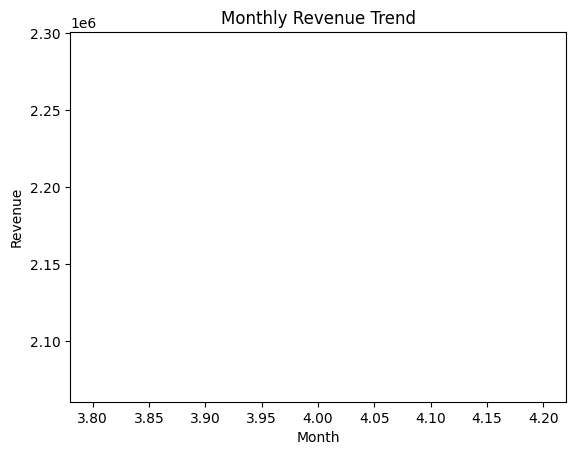

In [55]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('order_month')['amount'].sum()

plt.figure()
monthly_sales.plot(kind='line')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue Trend")
plt.show()

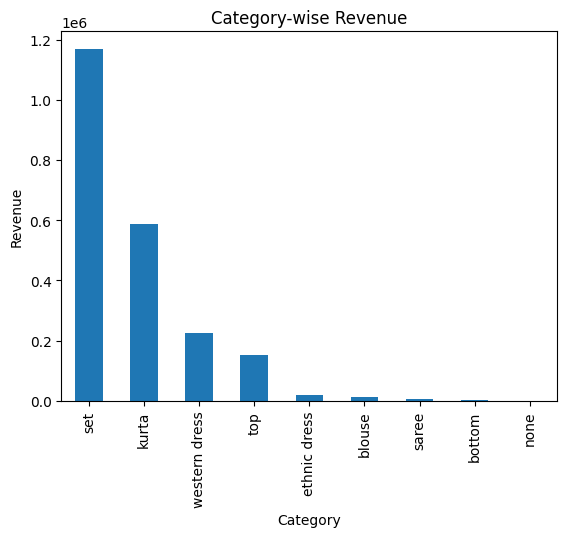

In [58]:
cat_sales = df.groupby('category')['amount'].sum().sort_values(ascending=False)

plt.figure()
cat_sales.plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.title("Category-wise Revenue")
plt.show()

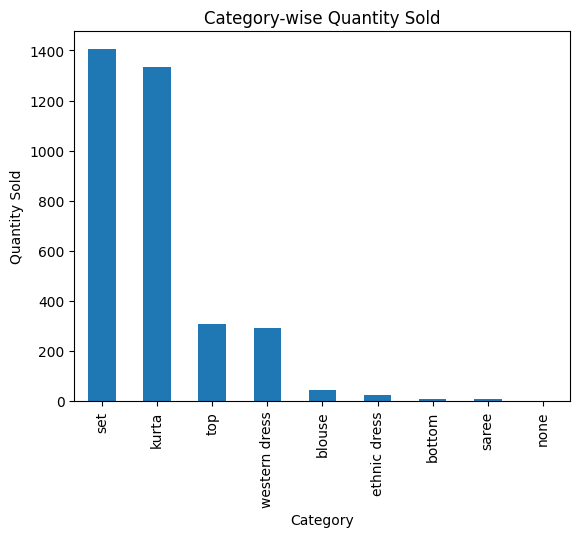

In [60]:
cat_qty = df.groupby('category')['qty'].sum().sort_values(ascending=False)

plt.figure()
cat_qty.plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Quantity Sold")
plt.title("Category-wise Quantity Sold")
plt.show()

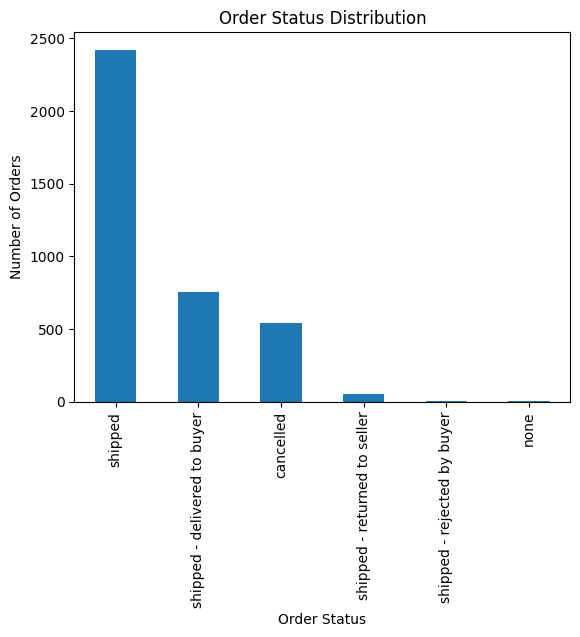

In [62]:
status_count = df['status'].value_counts()

plt.figure()
status_count.plot(kind='bar')
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.title("Order Status Distribution")
plt.show()


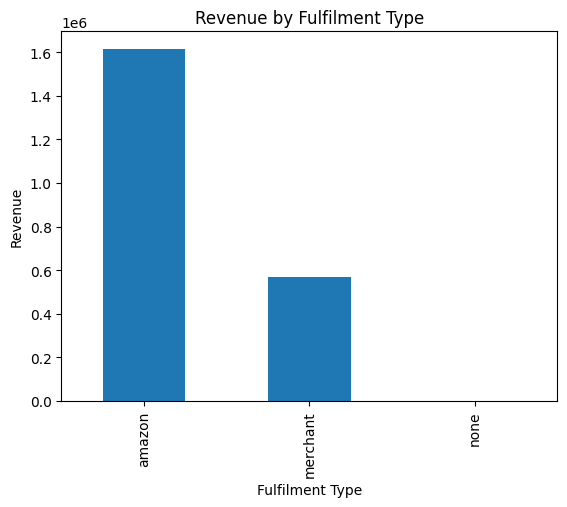

In [64]:
fulfil_sales = df.groupby('fulfilment')['amount'].sum()

plt.figure()
fulfil_sales.plot(kind='bar')
plt.xlabel("Fulfilment Type")
plt.ylabel("Revenue")
plt.title("Revenue by Fulfilment Type")
plt.show()

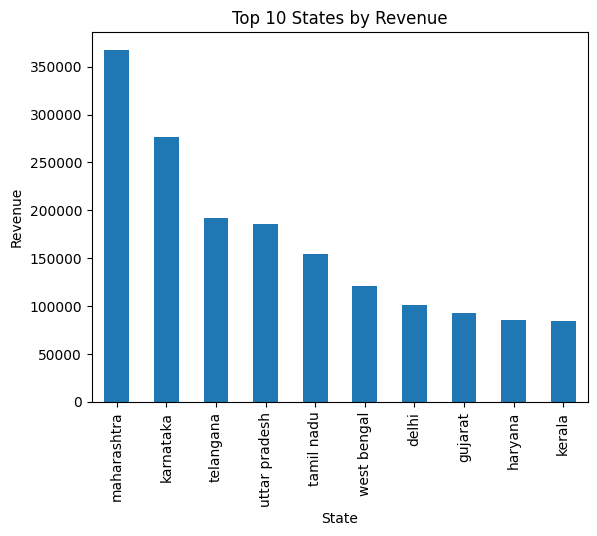

In [66]:
state_sales = df.groupby('ship-state')['amount'].sum().sort_values(ascending=False).head(10)

plt.figure()
state_sales.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Revenue")
plt.title("Top 10 States by Revenue")
plt.show()

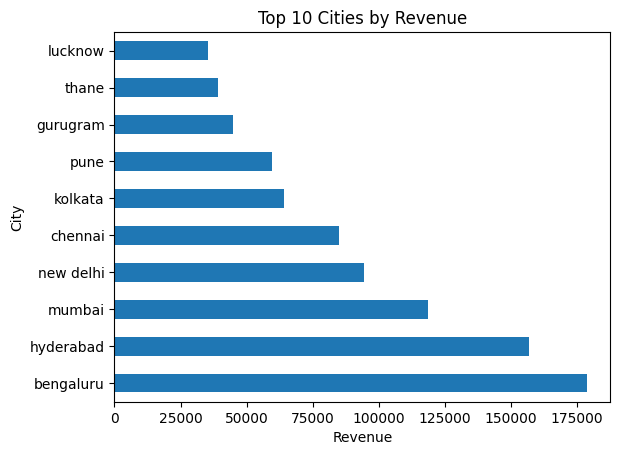

In [68]:
city_sales = df.groupby('ship-city')['amount'].sum().sort_values(ascending=False).head(10)

plt.figure()
city_sales.plot(kind='barh')
plt.xlabel("Revenue")
plt.ylabel("City")
plt.title("Top 10 Cities by Revenue")
plt.show()

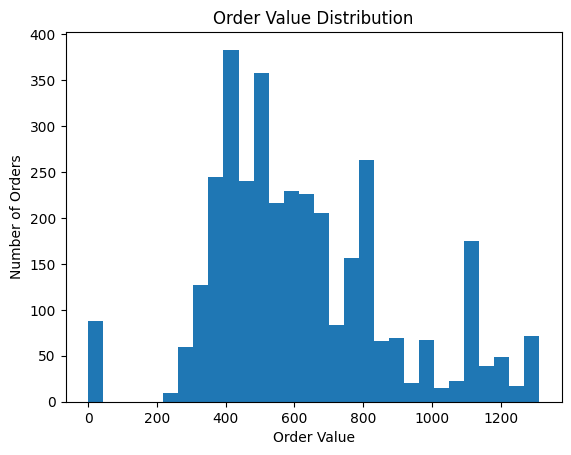

In [71]:
plt.figure()
plt.hist(df['amount'], bins=30)
plt.xlabel("Order Value")
plt.ylabel("Number of Orders")
plt.title("Order Value Distribution")
plt.show()

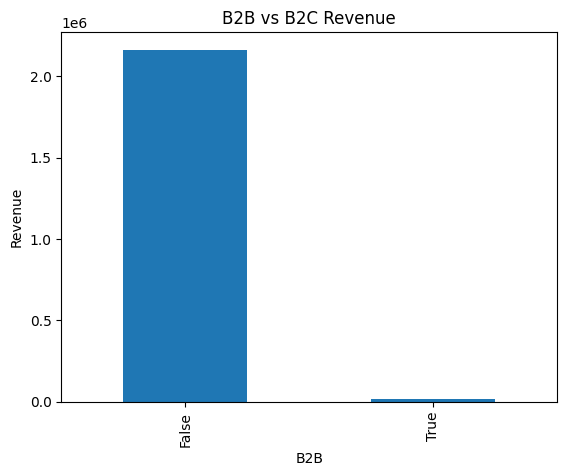

In [70]:
b2b_sales = df.groupby('b2b')['amount'].sum()

plt.figure()
b2b_sales.plot(kind='bar')
plt.xlabel("B2B")
plt.ylabel("Revenue")
plt.title("B2B vs B2C Revenue")
plt.show()